# Applying for one example:

## set the parameters

In [4]:
from functions import Apply_decoding, monitor_job_status, load_decoded_results, plot_decoder_accuracies
import submitit
import pandas as pd 
import numpy as np

PARAMS_preprocess = {'min_contrast': 1,  
          't_bin': 0.02, 'pre_stim': 0.5, 'post_stim': 1.0, 'min_time': 0,
            'filter_regions':  ['VISp', 'VISpm', 'VISam', 'VISa', 'VISrl', 'VISal', 'VISli', 'VISl'], 'only_good_clusters': True,
              'probabilityLeft_filter': [0.5], 
                'contrast_stim_filter': [0, 1]}

PARAMS_decoding = { 'test_strategy': 'passive', 'n_components': 5, 'feature_selection': 'average_clusters', 'n_time_bins': -1, 'n_permutations': 1000, 'n_folds': 5}
'''
        test_strategy : str
            Decoding procedure to use ('passive', 'active', 'both').
        n_components : int
            Number of PCA components to retain when feature_selection='pca'.
        feature_selection : str
            Feature selection method to use ('pca', 'average_clusters').
        n_time_bins : int, optional
            Number of time bins to include in the classification. If None, use all time bins.
'''


"\n        test_strategy : str\n            Decoding procedure to use ('passive', 'active', 'both').\n        n_components : int\n            Number of PCA components to retain when feature_selection='pca'.\n        feature_selection : str\n            Feature selection method to use ('pca', 'average_clusters').\n        n_time_bins : int, optional\n            Number of time bins to include in the classification. If None, use all time bins.\n"

## N-time effects
Here we want to see by adding more time samples what effect we will see in the decoding accurecy. it is kind of a sanity check


**PARAMS_preprocess**
| **Parameter**         | **Value**                                                                                     |
|-----------------------|-----------------------------------------------------------------------------------------------|
| min_contrast          | 1                                                                                             |
| t_bin                 | 0.02                                                                                          |
| pre_stim              | 0.5                                                                                           |
| post_stim             | 1.0                                                                                           |
| min_time              | 0                                                                                             |
| filter_regions        | ['VISp', 'VISpm', 'VISam', 'VISa', 'VISrl', 'VISal', 'VISli', 'VISl']                          |
| only_good_clusters    | True                                                                                          |
| probabilityLeft_filter| [0.5]                                                                                         |
| contrast_stim_filter  | [0, 1]                                                                                        |


**PARAMS_decoding** 

| **Parameter**         | **Value**                                                                                     |
|-----------------------|-----------------------------------------------------------------------------------------------|
| test_strategy         | 'passive'                                                                                     |
| n_components          | 5                                                                                            |
| feature_selection     | 'average_clusters'                                                                            |
| n_time_bins           | !!!!!                                                                                           |
| n_permutations        | 1000                                                                                          |
| n_folds               | 5                                                                                             |


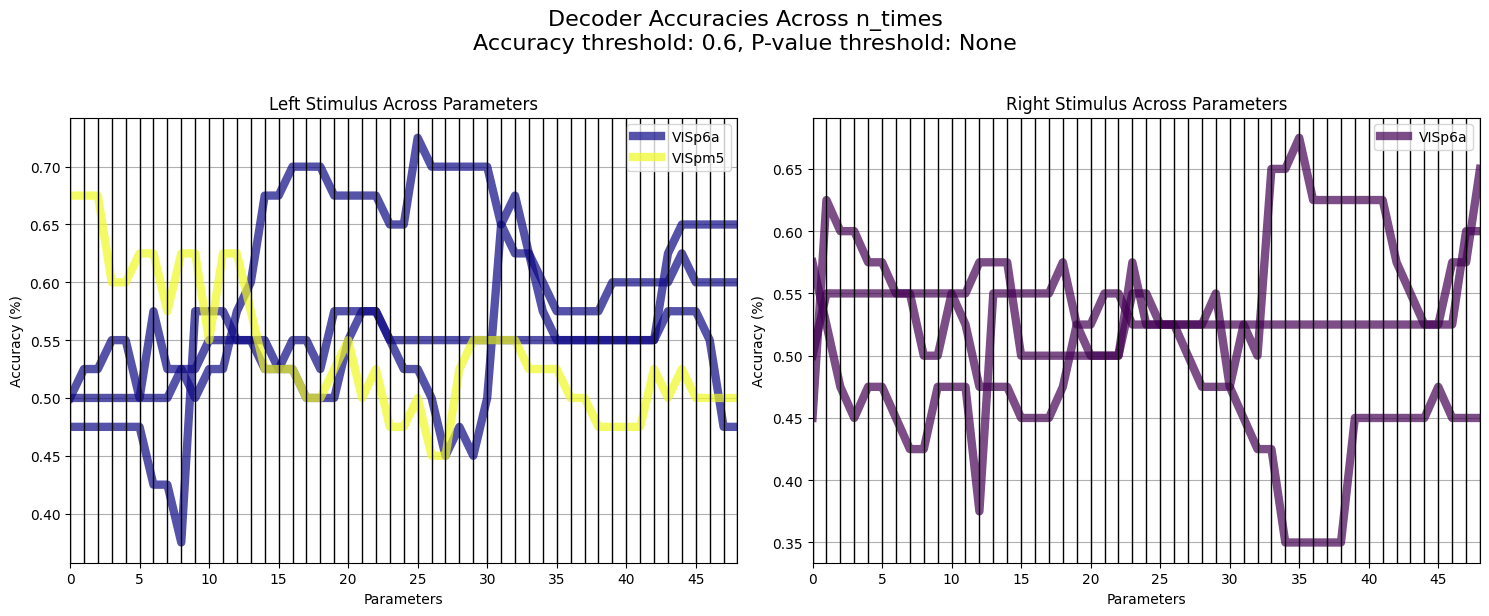

In [ ]:
pid = 'a8a59fc3-a658-4db4-b5e8-09f1e4df03fd'
eid = '5ae68c54-2897-4d3a-8120-426150704385'
##########
# submit jobs
##########
executor = submitit.AutoExecutor(folder='submitit_debug')
executor.update_parameters(slurm_array_parallelism= 60, mem_gb=15, timeout_min=300, slurm_partition="CPU", cpus_per_task=1)
all_jobs = []
save_paths = []
for n in range(1,51):
    PARAMS_decoding['n_time_bins'] = n
    PARAMS_preprocess['post_stim'] = n*0.02 + 0.02
    save_path = f"results/{pid}_n_time_bins_{n}.pkl"
    save_paths.append(save_path)
    job = executor.submit(Apply_decoding, eid, pid, PARAMS_preprocess, PARAMS_decoding,save = True, save_path = save_path) 
    all_jobs.append(job)
############

# monitor jobs
monitor_job_status(all_jobs)
####################

##############
# load results
###############
all_accuracies_right, all_accuracies_left, all_pvalues_right, all_pvalues_left, parameters, channel_info = load_decoded_results(pickle_paths= save_paths)
# all_accuracies_right, all_accuracies_left, all_pvalues_right, all_pvalues_left, parameters, channel_info = load_decoded_results(all_jobs=all_jobs)


###################
# plot results
###################
plot_decoder_accuracies(
    all_accuracies_right=all_accuracies_right,
    all_accuracies_left=all_accuracies_left,
    parameters=parameters,
    channel_info=channel_info,
    all_pvalues_right=all_pvalues_right,
    all_pvalues_left=all_pvalues_left,
    accuracy_threshold= 0.6,
    pvalue_threshold=None,
    dark_background= False,
    line_width=6.0, title = 'Decoder Accuracies Across n_times'
)


# different test strategy
passive : train on 80% of passive and test decoding on the 20% of passive untrainded data (using k-fold)

active: train on passive data and test on active data 

both: train on 80% of passive data and test on 20% of passive and all active data 




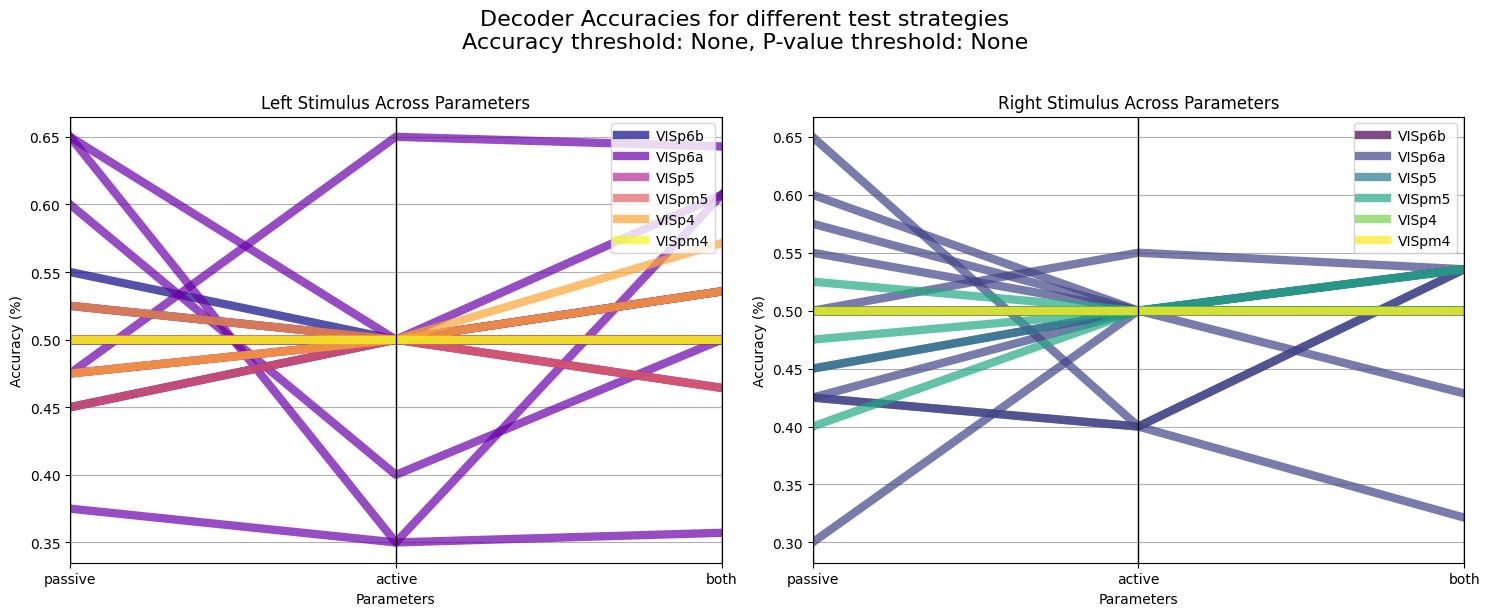

In [ ]:
pid = 'a8a59fc3-a658-4db4-b5e8-09f1e4df03fd'
eid = '5ae68c54-2897-4d3a-8120-426150704385'
##########
# submit jobs
##########
executor = submitit.AutoExecutor(folder='submitit_debug')
executor.update_parameters(slurm_array_parallelism= 60, mem_gb=15, timeout_min=300, slurm_partition="CPU", cpus_per_task=1)
all_jobs = []
save_paths = []
test_strategies = ['passive', 'active', 'both'] 
for n in test_strategies :
    PARAMS_decoding['test_strategy'] = n
    save_path = f"results/{pid}_Tstrategy_{n}.pkl"
    save_paths.append(save_path)
    job = executor.submit(Apply_decoding, eid, pid, PARAMS_preprocess, PARAMS_decoding,save = True, save_path = save_path) 
    all_jobs.append(job)
############

# monitor jobs
monitor_job_status(all_jobs)
####################

##############
# load results
###############
all_accuracies_right, all_accuracies_left, all_pvalues_right, all_pvalues_left, parameters, channel_info = load_decoded_results(parameters= test_strategies , pickle_paths= save_paths)

###################
# plot results
###################
plot_decoder_accuracies(
    all_accuracies_right=all_accuracies_right,
    all_accuracies_left=all_accuracies_left,
    parameters=parameters,
    channel_info=channel_info,
    all_pvalues_right=all_pvalues_right,
    all_pvalues_left=all_pvalues_left,
    accuracy_threshold= None,
    pvalue_threshold=None,
    dark_background= False,
    line_width=6.0, title = 'Decoder Accuracies for different test strategies'
)


# different feature selections

**PCA** : data [trials , clusters , times] --> [trials , clusters * times] PCA (select first 5 components)

**average**: data_new = data.mean(axis = 1)

In [ ]:
pid = 'a8a59fc3-a658-4db4-b5e8-09f1e4df03fd'
eid = '5ae68c54-2897-4d3a-8120-426150704385'
##########
# submit jobs
##########
executor = submitit.AutoExecutor(folder='submitit_debug')
executor.update_parameters(slurm_array_parallelism= 60, mem_gb=15, timeout_min=300, slurm_partition="CPU", cpus_per_task=1)
all_jobs = []
save_paths = []
feature_selections = ['pca', 'average_clusters']
for n in feature_selections :
    PARAMS_decoding['feature_selection'] = n
    save_path = f"results/{pid}_Fselection_{n}.pkl"
    save_paths.append(save_path)
    job = executor.submit(Apply_decoding, eid, pid, PARAMS_preprocess, PARAMS_decoding,save = True, save_path = save_path) 
    all_jobs.append(job)
############

# monitor jobs
monitor_job_status(all_jobs)
####################

##############
# load results
###############
all_accuracies_right, all_accuracies_left, all_pvalues_right, all_pvalues_left, parameters, channel_info = load_decoded_results(parameters= feature_selections , pickle_paths= save_paths)

###################
# plot results
###################
plot_decoder_accuracies(
    all_accuracies_right=all_accuracies_right,
    all_accuracies_left=all_accuracies_left,
    parameters=parameters,
    channel_info=channel_info,
    all_pvalues_right=all_pvalues_right,
    all_pvalues_left=all_pvalues_left,
    accuracy_threshold= None,
    pvalue_threshold=None,
    dark_background= False,
    line_width=6.0, title = 'Decoder Accuracies for feature selections'
)


Submitted 2 jobs.
